In [84]:
# from IPython.core.display import HTML
# css = open('custom.css').read() + open('custom.css').read()
# HTML('<style>{}</style>'.format(css))

FileNotFoundError: [Errno 2] No such file or directory: 'custom.css'

In [145]:
#https://data.world/quanticdata/occupation-and-salary-by-state-and-likelihood-of-automation/workspace/query?queryid=51754b08-7414-4f76-8a31-8b5c75166146
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'high-risk-in-your-st-occupation-and-salary-by-state-and-likelihood-of-automation-QueryResult.csv'
df = pd.read_csv(file_name, delimiter=',', index_col=None)
print(df.head())

   a_median      soc  probability  \
0     24300  41-9041         0.99   
1     24520  51-6051         0.99   
2     26470  51-9151         0.99   
3     30100  43-9021         0.99   
4     32890  25-4031         0.99   

                                          occupation  Illinois  
0                                      Telemarketers      7420  
1                                       Sewers; Hand         0  
2  Photographic Process Workers and Processing Ma...       820  
3                                  Data Entry Keyers      9140  
4                                Library Technicians      6480  


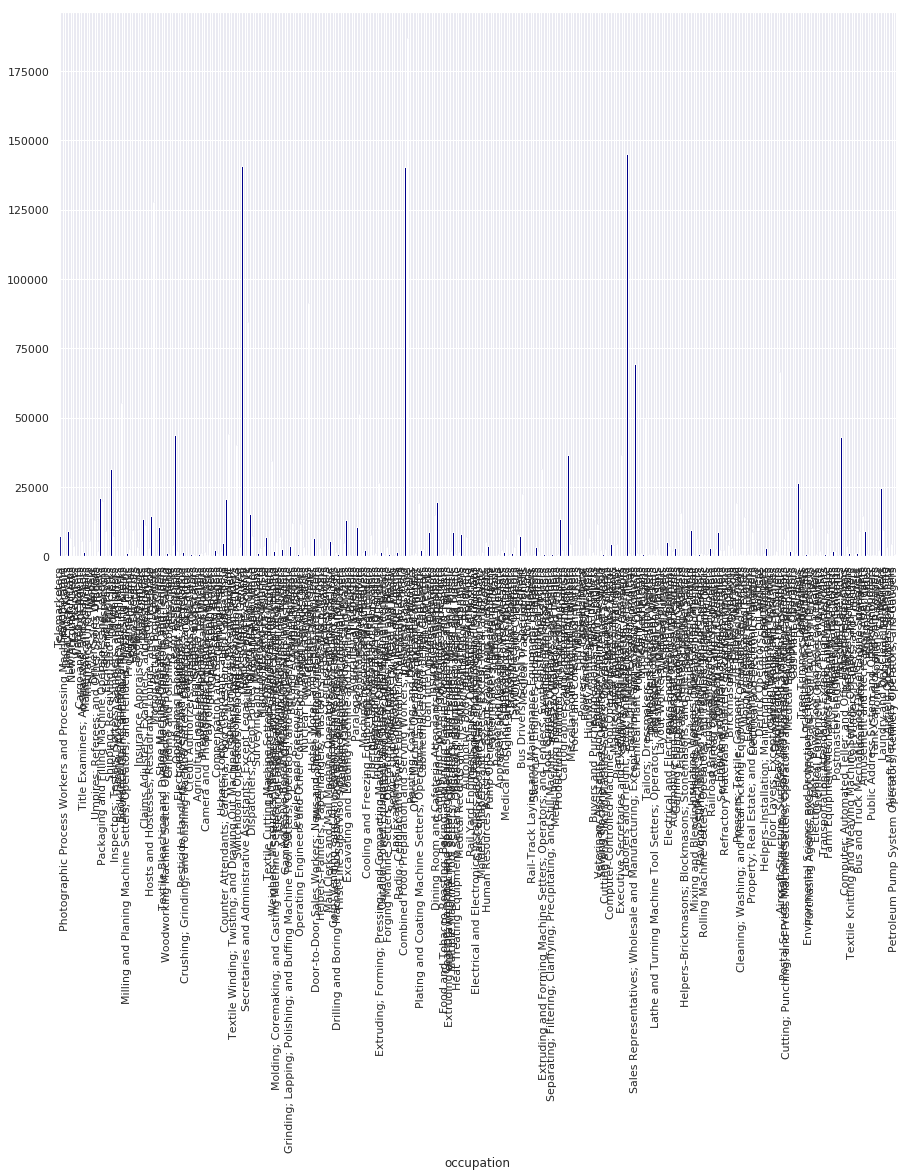

In [87]:
df.plot(x='occupation', y='Illinois', kind="bar", color='DarkBlue', legend=False, figsize=(15,10))

13


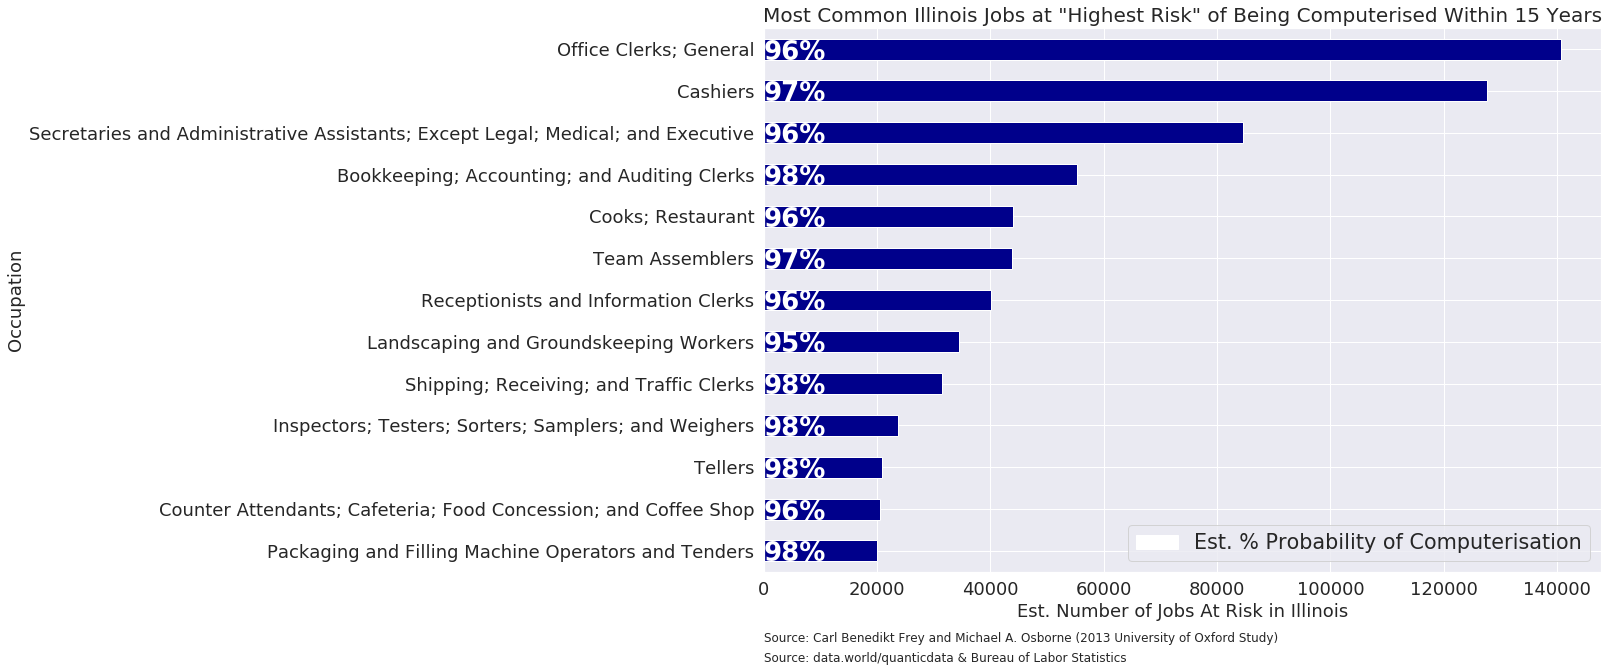

In [160]:
import matplotlib.patches as mpatches

#df = df[df['probability'] > 0.95]
df = df.sort_values(by=['probability'], ascending=False)
#df = df[(df.occupation.str.contains('Data'))]
# print(df.head())
# print(df.index.size)
# # df = df[['occupation','probability']]
# print(df)
df = df.nlargest(30, 'Illinois')
df = df[df['probability'] >= 0.95]
print(df.index.size)
df.plot.barh(x='occupation', y='Illinois', color='DarkBlue', legend=False, figsize=(15,10))
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.gca().invert_yaxis()
probs = list(df['probability'])
for i, v in enumerate(probs):
    percent = str(v).replace('0.','') + '%'
    plt.text(v + 3, i + .25, percent, color='white', fontweight='bold', fontsize=26)
white_patch = mpatches.Patch(color='white', label='Est. % Probability of Computerisation')
plt.legend(handles=[white_patch], fontsize = 'xx-large')
plt.ylabel('Occupation', fontsize=18)
plt.xlabel('Est. Number of Jobs At Risk in Illinois', fontsize=18)
plt.title('Most Common Illinois Jobs at "Highest Risk" of Being Computerised Within 15 Years', fontsize=20)
plt.annotate('Source: Carl Benedikt Frey and Michael A. Osborne (2013 University of Oxford Study)', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Source: data.world/quanticdata & Bureau of Labor Statistics', (0,0), (0, -80), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('Most Common Jobs at "High Risk" of Being Computerised.png', bbox_inches='tight')

25


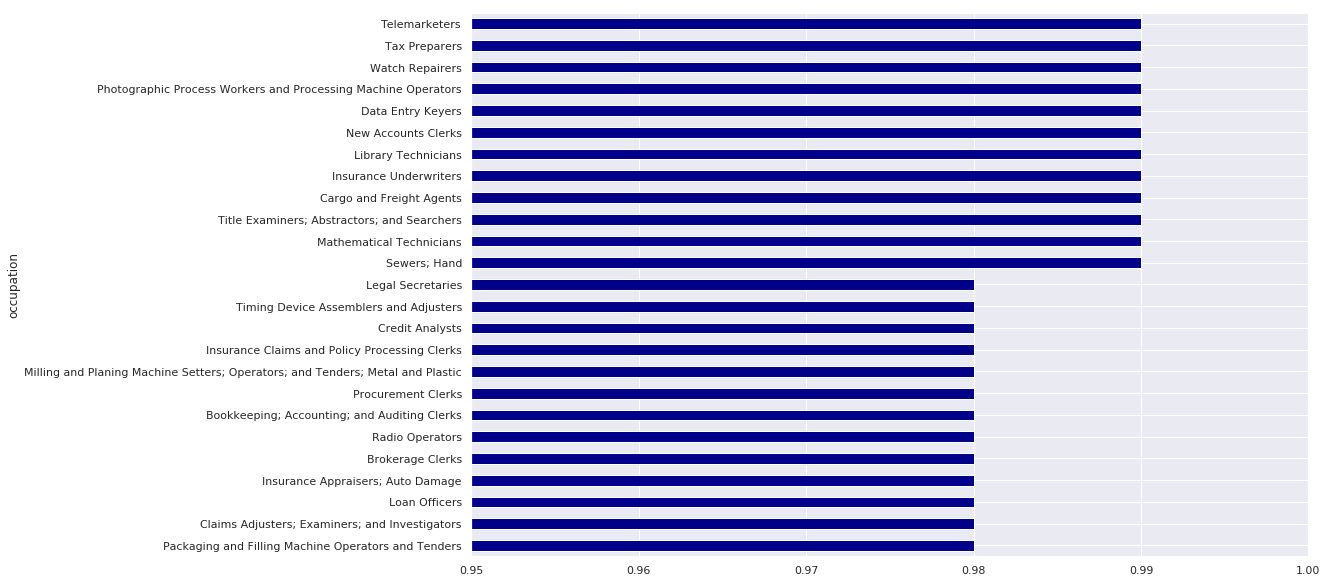

In [64]:
df = df.nlargest(25, 'probability')
print(df.index.size)
df.plot.barh(x='occupation', y='probability', color='DarkBlue', legend=False, figsize=(15,10))
plt.xlim(0.95, 1)
plt.gca().invert_yaxis()

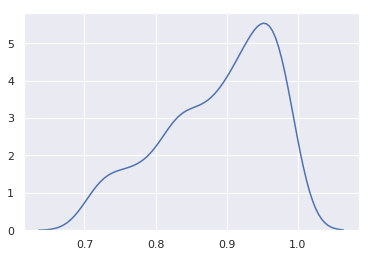

In [61]:
import seaborn as sns
test = list(df['probability'])
sns.set()
sns.kdeplot(data=test)

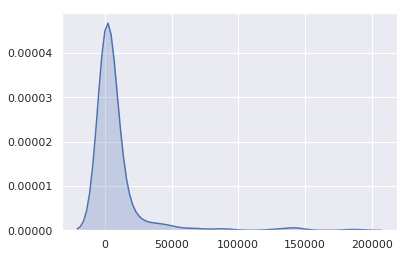

In [62]:
test2 = list(df['Illinois'])
sns.kdeplot(test2, shade=True)

In [83]:

#According to Jupyter documentation custom.css should be put into the default_profile/static/custom folders.

#You will find the location of your default profile by running in a Jupyter notebook cell:

import jupyter_core
jupyter_core.paths.jupyter_config_dir()

'/home/erick/.jupyter'